# Data Preprocessing

**Importing and Exploring** <br/>
We import the data and print it in order to get a sense of the type of data we are dealing with. Additionally we explore basic information such as the mean distribution of the "PAY" values based on if they were "Accepted" or "Declined" rides. 

In [2]:
# Importing the data and observing a sample of it
import pandas as pd
data = pd.read_csv('driverAcceptanceData - driverAcceptanceData.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,PAY,ACCEPTED
0,29.358732,0
1,22.986847,0
2,18.020348,0
3,45.730717,1
4,14.642845,0


In [3]:
# Checking means
data_mean = data['PAY'].groupby(data['ACCEPTED']).mean()
df = pd.DataFrame(data_mean)
dfmean = df.T
dfmean.columns = [['Rejected', 'Accepted']]
dfmean

,Rejected,Accepted
PAY,18.624636,32.076048


**Raw Data Visualization** <br/>
We then proceed to visualize the data in order to get a better sense of the shape of the distribution.

[Text(0.5, 0, '')]

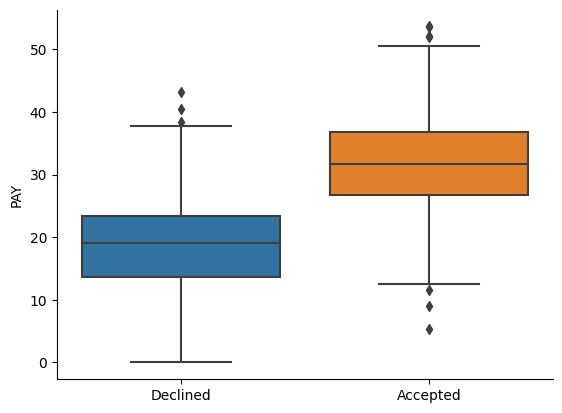

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(x=data['ACCEPTED'], y=data['PAY'])
sns.despine(top=True, right=True)
ax.set_xticklabels(['Declined','Accepted'])
ax.set(xlabel=None)

At first glance it seems that both Accepted and Declined payment distributions adhere to a Gaussian/Normal distribution. However, there seems to be some outliers that should be dealt with before continuing our analysis.

In [5]:
# Getting rid of Outliers using the Interquartile method
import numpy as np
Declined = data[data['ACCEPTED']==0].reset_index(drop=True)
q75,q25 = np.percentile(Declined['PAY'], [75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
Declined[Declined["PAY"] < min] = np.nan
Declined[Declined["PAY"] > max] = np.nan

Accepted = data[data['ACCEPTED']==1].reset_index(drop=True)
q75,q25 = np.percentile(Accepted['PAY'], [75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
Accepted[Accepted["PAY"] < min] = np.nan
Accepted[Accepted["PAY"] > max] = np.nan


C:\Users\chiaw\AppData\Local\Temp\ipykernel_17088\92208927.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_clean = Accepted.append(Declined)


<AxesSubplot: xlabel='ACCEPTED', ylabel='PAY'>

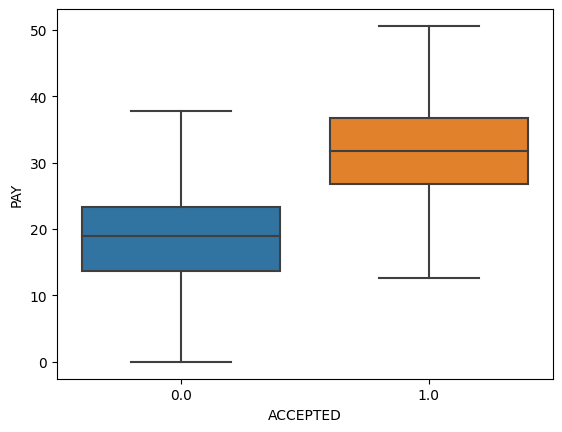

In [6]:
# Visualizaing new distributions
data_clean = Accepted.append(Declined)
sns.boxplot(x=data_clean['ACCEPTED'], y=data_clean['PAY'])

Once we have gotten rid of the outliers using an interquartile approach we can proceed to check our assumption of normal distribution. In order to do so we will employ a Shapiro-Wilks Test

In [7]:
from scipy.stats import shapiro 

#Shapiro-Wilk test for normality
print(shapiro(data_clean[data_clean['ACCEPTED']==1]['PAY']))
print(shapiro(data_clean[data_clean['ACCEPTED']==0]['PAY']))


ShapiroResult(statistic=0.9954842329025269, pvalue=0.13742683827877045)
ShapiroResult(statistic=0.9946429133415222, pvalue=0.10058016330003738)


The results from this test show a p-value of 0.14 and 0.10 for our Accepted and Declined distributions, values above our 0.05 threshold. Therefore we can assume that both distributions adhere to the characteristics of a normal distribution going forward with our analysis.

**Percentage of Ride Decline x Amount Payed**

 In order to asses the % of Driver Acceptance we must compare the proportion of
 Accepted vs Declined requests at every PAY point. Due to PAY being a continuous
 variable we will need to group them based on intervals. The smaller these intervals
 the more precise our measurements will be. However, given our small sample size of 1000
data points we wont be able to be very precise and will opt for an interval size of 1 $

In [8]:
# Distribution range
Min = int(data_clean['PAY'].min())
Max = int(round(data_clean['PAY'].max(), 0))
# Range of our distribution [0,51]

In [ ]:
# Creating the intervals
import numpy as np
Accepted = data_clean[data_clean['ACCEPTED']==1]
Declined = data_clean[data_clean['ACCEPTED']==0]

# Set up
Intervals = []
start = 0
for i in range(0, 51):
    Intervals.append(start)
    start = start + 1

Accepted.loc[:,'Counter'] = 1
Declined.loc[:,'Counter'] = 1


Int_Accepted = Accepted.groupby(pd.cut(Accepted['PAY'], Intervals)).sum()
Int_Declined = Declined.groupby(pd.cut(Declined['PAY'], Intervals)).sum()


Recreating our initial dataframe with our intervals as indexes and grouping PAY values based on these indexes. Additionally, adding an extra column "% Declined" which is calculated by: [Number of Declined Rides] * 100 / [Total Rides Requested] within each [PAY] interval.

In [10]:
Clean_df = Int_Accepted.drop(['ACCEPTED', 'PAY'], axis=1).rename(columns={"Counter":"Accepted"})
Clean_df['Declined'] = Int_Declined.drop(['ACCEPTED', 'PAY'], axis=1)

Clean_df['% Declined'] = round(Clean_df['Declined'] * 100 / (Clean_df['Accepted'] + Clean_df['Declined']), 2)
Clean_df.head()

,Accepted,Declined,% Declined
PAY,,,
"(0, 1]",0,3,100.0
"(1, 2]",0,1,100.0
"(2, 3]",0,0,NaN
"(3, 4]",0,3,100.0
"(4, 5]",0,4,100.0


We then proceed to visualize the % of Declined rides by each price point.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '(0, 1]'),
  Text(1, 0, '(1, 2]'),
  Text(2, 0, '(2, 3]'),
  Text(3, 0, '(3, 4]'),
  Text(4, 0, '(4, 5]'),
  Text(5, 0, '(5, 6]'),
  Text(6, 0, '(6, 7]'),
  Text(7, 0, '(7, 8]'),
  Text(8, 0, '(8, 9]'),
  Text(9, 0, '(9, 10]'),
  Text(10, 0, '(10, 11]'),
  Text(11, 0, '(11, 12]'),
  Text(12, 0, '(12, 13]'),
  Text(13, 0, '(13, 14]'),
  Text(14, 0, '(14, 15]'),
  Text(15, 0, '(15, 16]'),
  Text(16, 0, '(16, 17]'),
  Text(17, 0, '(17, 18]'),
  Text(18, 0, '(18, 19]'),
  Text(19, 0, '(19, 20]'),
  Text(20, 0, '(20, 21]'),
  Text(21, 0, '(21, 22]'),
  Text(22, 0, '(22, 23]'),
  Text(23, 0, '(23, 24]'),
  Text(24, 0, '(24, 25]'),
  Text(25, 0, '(25, 26]'),
  Text(26, 0, '(26, 27]'),
  Text(27, 0, '(27, 28]'),
  Text(28, 0, '(28, 29]'),
  Text(29, 0, '(29, 

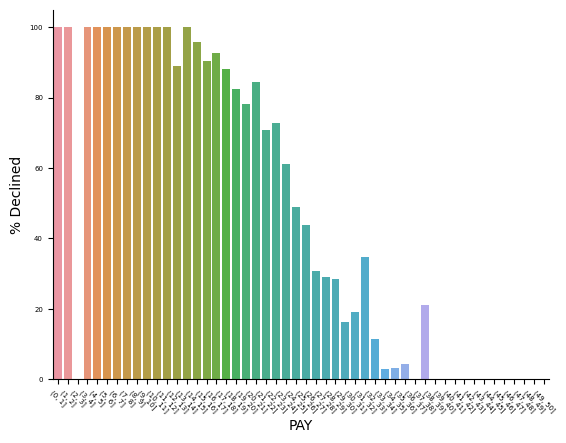

In [14]:
# Quick Visualization of likelyhood of rejection
ax = sns.barplot(x=Clean_df.index, y=Clean_df['% Declined'])
sns.despine(top=True, right=True)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xticks(rotation = -45)



As expected there is a reduction in the % of declined rides as we increase the pay offered to drivers. However, even with a low sensitivity (1$ intervals) we dont have enough data to plot a smooth transition between intervals. As we can see, there is noticeable sudden "jumps" within the (31, 32] and (37,38] intervals mostlikely caused by our low number of samples.

**Data Generation**

Given that both Decline and Accepted ride request both exhibit a Gaussian/Normal distribution we are able to generate further data points based on the characteristics (mean and standard deviation) of their respective distributions. We will therefore recreate these distributions with a sample size of 100.000.000 data points which will enable us to generate a more accurate estimate of which rides were accepted/declined for every driver offer range.

In [31]:
from numpy.random import normal

# Declined Data Generation
mean_d = data_clean[data_clean['ACCEPTED']==0]['PAY'].mean()
std_d = data_clean[data_clean['ACCEPTED']==0]['PAY'].std()
Dec_Pay = normal(loc=mean_d, scale=std_d, size=100000000)

# Accepted Data Generation
mean_a = data_clean[data_clean['ACCEPTED']==1]['PAY'].mean()
std_a = data_clean[data_clean['ACCEPTED']==1]['PAY'].std()
Ac_Pay = normal(loc=mean_a, scale=std_a, size=100000000)


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)   
ax1 = fig.add_subplot(211)
ax2 = plt.subplot(212, sharex = ax1, sharey = ax1)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Declined
sns.histplot(data=Dec_Pay, ax=ax1)

ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.set_xlim(0,60)

# Accepted
sns.histplot(data=Ac_Pay, ax=ax2)

ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')

# Common Title
ax.set_xlabel('100 Million Data Points')

# Subplot Titles
ax1.set_title('Declined', fontsize=10)
ax2.set_title('Accepted', fontsize=10)
ax2.set_xlabel('Driver Pay')

plt.subplots_adjust(hspace=0.4)

We can see in the above plots that the extreme values on the left side of out new Declined data set go beyond the 0 PAY point. Since we are not interested in unrealistic values we proceed to get rid of them:

In [39]:
# Getting rid of values under 0
Ac_Pay = Ac_Pay[Ac_Pay >= 0]
len(Ac_Pay)
Dec_Pay = Dec_Pay[Dec_Pay >= 0]
len(Dec_Pay)
print("Our sample size of accepted rides is now equal " + str(len(Ac_Pay)))
print("Our sample size of declined rides is now equal " + str(len(Dec_Pay)))


Our sample size of accepted rides is now equal 99999639
Our sample size of declined rides is now equal 99477697


The datramatic increase in sample size will enable us to both increase our precision in [% Decline] estimates and decrease our [PAY] intervals, effectively increasing our sensitivity. <br/>
We once again proceed to group our newly generated data into intervals. This time with 0.01 $ sizes. 

In [40]:
# Grouping Accepted/Declined data in 0.01 width intervals
Max = int(round(Ac_Pay.max(), 0))
Min = int(round(Dec_Pay.min(), 0))
# Creating intervals with 0.01 width
Intervals = []
start = 0
for i in range(Min, Max*100):                          
    Intervals.append(start)
    start = start + 0.01
Intervals = np.round(Intervals[:], 2)


Accepted = pd.DataFrame(Ac_Pay)
Declined = pd.DataFrame(Dec_Pay)

Accepted.rename(columns={0:'PAY'}, inplace=True)
Declined.rename(columns={0:'PAY'}, inplace=True)

Accepted.loc[:,'Counter'] = 1
Declined.loc[:,'Counter'] = 1

C_Accepted = Accepted.groupby(pd.cut(Accepted['PAY'], Intervals)).sum()
C_Declined = Declined.groupby(pd.cut(Declined['PAY'], Intervals)).sum()


(0.0, 60.0)

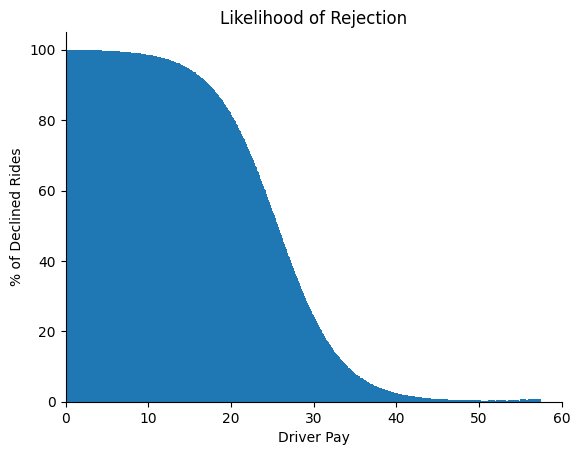

In [45]:
# Recreating our dataframe of interest 
Percent_df = C_Accepted.drop('PAY', axis=1).rename(columns={"Counter":"Accepted"})
Percent_df['Declined'] = C_Declined['Counter']

# Defining our [% Declined] column 
Percent_df['% Declined'] = round(Percent_df['Declined'] * 100 / (Percent_df['Accepted'] + Percent_df['Declined']), 2)
#Percent_df = Percent_df.dropna()



plt.bar(Intervals[1:], Percent_df['% Declined'][0:])
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.title('Likelihood of Rejection')
plt.xlabel('Driver Pay')
plt.ylabel('% of Declined Rides')

plt.xlim(0,60)
# Our result is an inverse sigmoid function as shown below

As seen above, our resulting [% Decline] describes an inverse sigmoid distribution. We can also appreciate some deviance from this distribution at the right tail end. This should be revised. However, since the 30$ marks our break even point it will be irrelevant for our specific case and therefore will be ignored going forward.

# Fixed Price Strategy

**Rejection function**

Now that we have our data cleaned and expanded we can proceed to our next step, creating functions that will optimize our profits given our problem restrictions. 

In [47]:
# This function will result in a float which when multipled by the amount
# of Ride Requests will output the total number of ACCEPTED Ride Requests
# given the parameter X which is the amount paid to the DRIVER
def Acceptance_Rate(x):
    Percent = 1 - Percent_df.loc[x]['% Declined']/100
    return Percent

1. Function Set Up
We import the necessary libraries and set up our initial parameters which are:
- Lambda Value: 1
- Number of Riders: 1.000
- Maximun Possible Riders: 10.000
- Exhausted Riders: 0 
- Empty Profit List: []

2. Main For Loop
Since our program will last for a total of 12 months we will itterate the process of calculating our profits 12 times, once per month. There is a trigger set in place to stop the process if the number of Exhausted Riders goes over our preestablished 10.000 mark, this would mean that we have exhausted all of our possible riders and the program ends. 

2.1 Calculating our Poisson Distribution
The number of rides per rider is described by a Poisson Distribution. For our first run, the number of samples of this distribution will be 1.000 and our lambda will be 1. The resulting distribution is saved within TotalLamb_Dist list. This list is then used in order to extract two essential components:
- Unique_Values: A list containing the unique number of ride requests within TotalLamb_Dist.
- NRi_NRe: A list containing the number of riders per unique number of ride requets.
Example:
        Unique_Values = [0, 1, 2, 3, 4, 6]
        NRi_NRe = [300, 200, 100, 50, 10, 1]

        300 Riders have requested 0 Rides
        200 Riders have requested 1 Ride
        100 Riders have requested 2 Rides
        50  Riders have requested 3 Rides
        10  Riders have Requested 4 Rides
        1   Rider  has  Requested 6 Rides

2.2 Number of Requests Accepted per Number of Requests Made
We then proceed to calculate the number of requests accepted per Unique_Value. This is achieved through a costum function "rider_lambda" which requieres our previous lists as inputs. The function begins by dumping the initial element of each list as it corresponds with the number of users who have not requests any rides. Then it goes through each element within our NRi_NRe list and calculates the number of accepted rides per rider per number of requests given the probability of acceptance based on the Driver Pay amount as follows:
        Given a 20% Acceptance rate and
        Lambda_Values = [1, 2, 3, 4, 6]
        NRi_NRe_Values = [200, 100, 50, 10, 1]

        Results:
        200*0.2^1 = 40.00; Out of the 200 people which requested a ride 1 time 40 were Accepted

        100*0.2^1 = 20.00 
        100*0.2^2 =  4.00

        20 - 4    = 16.00; Out of the 100 people which requested a ride 2 times 16 were Accepted 1 time
                     4.00; Out of the 100 people which requested a ride 2 times  4 were Accepted 2 times
    
        50*0.2^1  = 10.00
        50*0.2^2  =  2.00
        50*0.2^3  =  0.04

        10 - 2    =  8.00; Out of the  50 people which requested a ride 3 times 8 were accepted 1 time
        2 - 0.04  =  1.96; Out of the  50 people which requested a ride 3 times 1.96 were accepted 2 times
                     0.04; Out of the  50 people which requested a ride 3 times 0.04 were accepted 3 times
        (...)

Once the function goes through each element it groups riders by the amount of requests accepted, regardless of the amount of requests made and rounded to the closest whole number. Finally, it drops values which are equal to zero. The final result is a list of accepted riders (Rider_Lamb) whose element position indicates the number of rides accepted, much like our previous Unique_Values and NRi_NRe List.
Example for x = 20:
        Rider_Lamb = [113.0, 9.0, 1.0]

        113 riders have been Accepted 1 time
          9 riders have been Accepted 2 times
          1 rider  has  been Accpeted 3 times

2.3 Calculating Profit
Now that we have a list which describes the number of accepted rides we can easily calculate our profit as the difference between our earnings, defined as number of total rides accepted x 30, and costs, defined as total of rides accepted x Driver Pay.

2.4 Next Loop Set Up
Our final step is to determine the parameters for our next loop which are:
Exhausted Riders: Number of riders who exit the program because either they did not use the service or were not accepted once. 
New Rider Pool: Established by our Accepted Ride list (Rider_Lamb) previously described and an additional 1000 new users added to the initial element of the list.
New Lambda Values: A list which contains the values of our new lambda values which is determined by the element positions of our Accepted Ride list. 

After these elements are established the program itterates the process another 11 times before outputing a final profit value which is equal to the sum of the profits generated throughout the 12 months.


After some exploration it is expected that the Attrition rate given current restrictions is so high that we exhaust our pool of 10.000 riders before the 12th month mark. 

In [ ]:

import numpy as np
from scipy.stats import poisson
import itertools

# Initial Parameters
x=20
lamb = [1]                                                                           # Initial lambda value for our poisson distributions
Ri_Retention = [1000]                                                                # Initial number of riders for first month
Max_Riders = 10000                                                                   # Max. number of possible customers

Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
Profit = []                                                                          # Profit per itteration (month)

# Poisson Distribution of every previous Lambda
for month in range(0, 12):

# Halting if Riders are exhausted
    if Max_Riders <= Exhausted_Riders:
        break

    Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
    for ele in range(0, len(lamb)):
        Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

    Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
    Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

# Number of Riders per Number of Requests
    NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
    for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
        NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

# We calculate the number of riders per lambda
        Lambda_Values = Unique_Values[1:]
        NRi_NRe_Values = NRi_NRe[1:] 

        Probability = []

        for i in range(0, len(NRi_NRe_Values)):
            Inner_List = []
            Exp = Lambda_Values[i]
            for e in range(1, 1+Exp):
                Inner_List.append(NRi_NRe_Values[i]*Acceptance_Rate(x)**e)
            for u in range(0, len(Inner_List)-1):
                Inner_List[u] = Inner_List[u] - Inner_List[u+1]
            Probability.append(Inner_List)

    Rider_Lamb = [round(sum(i),0) for i in itertools.zip_longest(*Probability, fillvalue=0)]

    Rider_Lamb = [i for i in Rider_Lamb if i != 0]
    print(Rider_Lamb)
# We calculate profits
    # Earings
    Earn = []
    for i in Rider_Lamb:
        Earn.append(i * (Rider_Lamb.index(i) + 1) * 30)
    Earn = sum(Earn)

    #Spending
    Spen = []
    for i in Rider_Lamb:
        Spen.append(i * (Rider_Lamb.index(i) + 1) * x)
    Spen = sum(Spen)

    #Profit
    Profit.append(Earn - Spen)

# We calculate our new parametters (Rider_Retention, New Lambdas and Exhausted Riders)
    Attrition = sum(Ri_Retention) - sum(Rider_Lamb)
    
    Ri_Retention = Rider_Lamb
    if  len(Ri_Retention) == 0:
        Ri_Retention = [0] 
    Ri_Retention[0] = Ri_Retention[0] + 1000

    lamb = list(range(1, len(Rider_Lamb)+1))

    Exhausted_Riders = Exhausted_Riders + Attrition                 # New Exhausted Riders
    
 




In [62]:
# Creating a function based on the previously described loop
def profit(x):

    import numpy as np
    from scipy.stats import poisson
    import itertools

    # Initial Parameters
    lamb = [1]                                                                           # Initial lambda value for our poisson distributions
    Ri_Retention = [1000]                                                                # Initial number of riders for first month
    Max_Riders = 10000                                                                   # Max. number of possible customers

    Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
    Profit = []                                                                          # Profit per itteration (month)

    # Poisson Distribution of every previous Lambda
    for month in range(0, 12):

    # Halting if Riders are exhausted
        if Max_Riders <= Exhausted_Riders:
            break

        Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
        for ele in range(0, len(lamb)):
            Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

        Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
        Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

    # Number of Riders per Number of Requests
        NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
        for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
            NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

    # We calculate the number of riders per lambda
            Lambda_Values = Unique_Values[1:]
            NRi_NRe_Values = NRi_NRe[1:] 

            Probability = []

            for i in range(0, len(NRi_NRe_Values)):
                Inner_List = []
                Exp = Lambda_Values[i]
                for e in range(1, 1+Exp):
                    Inner_List.append(NRi_NRe_Values[i]*Acceptance_Rate(x)**e)
                for u in range(0, len(Inner_List)-1):
                    Inner_List[u] = Inner_List[u] - Inner_List[u+1]
                Probability.append(Inner_List)

        Rider_Lamb = [round(sum(i),0) for i in itertools.zip_longest(*Probability, fillvalue=0)]

        Rider_Lamb = [i for i in Rider_Lamb if i != 0]
    # We calculate profits
        # Earings
        Earn = []
        for i in Rider_Lamb:
            Earn.append(i * (Rider_Lamb.index(i) + 1) * 30)
        Earn = sum(Earn)

        #Spending
        Spen = []
        for i in Rider_Lamb:
            Spen.append(i * (Rider_Lamb.index(i) + 1) * x)
        Spen = sum(Spen)

        #Profit
        Profit.append(Earn - Spen)

    # We calculate our new parametters (Rider_Retention, New Lambdas and Exhausted Riders)
        Attrition = sum(Ri_Retention) - sum(Rider_Lamb)
    
        Ri_Retention = Rider_Lamb
        if  len(Ri_Retention) == 0:
            Ri_Retention = [0] 
        Ri_Retention[0] = Ri_Retention[0] + 1000

        lamb = list(range(1, len(Rider_Lamb)+1))

        Exhausted_Riders = Exhausted_Riders + Attrition                 # New Exhausted Riders
    return sum(Profit)

Now that we have our fuction defined we can itterate over all our interval values of interest ([0.01, 30.00]) in order to observe the distribution of proffits across price ranges.

In [155]:
from tqdm import tqdm
# Itterating our function over every price interval
List_Profit = []

# We can limit the itterations from 0 up until 30 since its the break-even point
for i in tqdm(Intervals[np.where(Intervals == 0.01)[0][0]:np.where(Intervals == 30.01)[0][0]]):
    List_Profit.append(profit(i))




100%|██████████| 3000/3000 [07:29<00:00,  6.68it/s]


(0.0, 31.0)

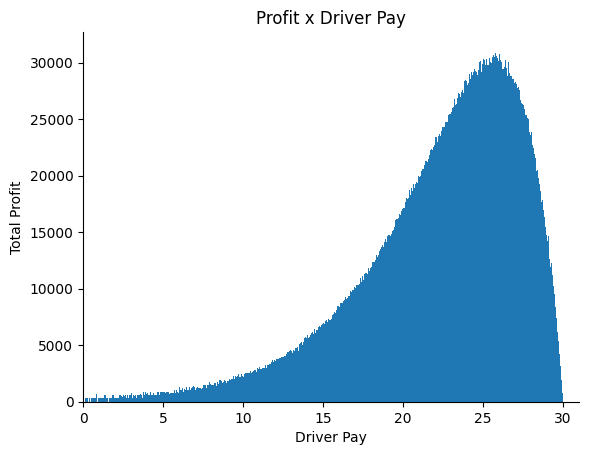

In [156]:
Profit_df = pd.DataFrame(List_Profit)
Profit_df = Profit_df.set_index([Intervals[1:3001]])
Profit_df.columns = ['Profit']



plt.bar(Intervals[1:3001], Profit_df['Profit'][0:], width=0.01)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.title('Profit x Driver Pay')
plt.xlabel('Driver Pay')
plt.ylabel('Total Profit')

plt.xlim(0,31)

The figure above seems to represent a log normal distribution. However, this is taken from just one sample per Driver Pay. We could further itterate throughout the whole range of intervals but since we are only interested in maximizing our profits we can set a cut of point at 27.500$. We then obtain the min and max intervals that satisfy this condition and itterate over this smaller sample, saving computing time.


In [195]:
Min_Interval = Profit_df[Profit_df['Profit']>=29000].index.min()
Max_Interval = Profit_df[Profit_df['Profit']>=29000].index.max()
print("Minimun Interval: " + str(Min_Interval))
print("Maximun Interval: " + str(Max_Interval))

Minimun Interval: 24.15
Maximun Interval: 26.82


In [207]:
# Selecting only the interval [24.15, 26.99] and itterating 1000 times
from tqdm import tqdm
# Itterating our function over every price interval
T_LP_Interval = []

for u in tqdm(range(0, 100)):
    List_Profit_Interval = []
    for i in Intervals[np.where(Intervals == Min_Interval)[0][0]:np.where(Intervals == Max_Interval)[0][0]]:
        List_Profit_Interval.append(profit(i))
    T_LP_Interval.append(List_Profit_Interval)
    
Total = np.mean(T_LP_Interval, axis=0)



100%|██████████| 100/100 [1:40:42<00:00, 60.43s/it]


In [210]:
Total = np.mean(T_LP_Interval, axis=0)
Total_df = pd.DataFrame(Total)
Total_df = Total_df.set_index([Intervals[
    int(str(Min_Interval).replace('.', '')):int(str(Max_Interval).replace('.', ''))]])
Total_df.columns = ['Profit']
Total_df



,Profit
24.15,28804.4640
24.16,28575.2368
24.17,28491.0934
24.18,28633.8180
24.19,28574.9744
...,...
26.77,28942.2535
26.78,29024.4682
26.79,28962.9312
26.80,28613.8240


(0.0, 31000.0)

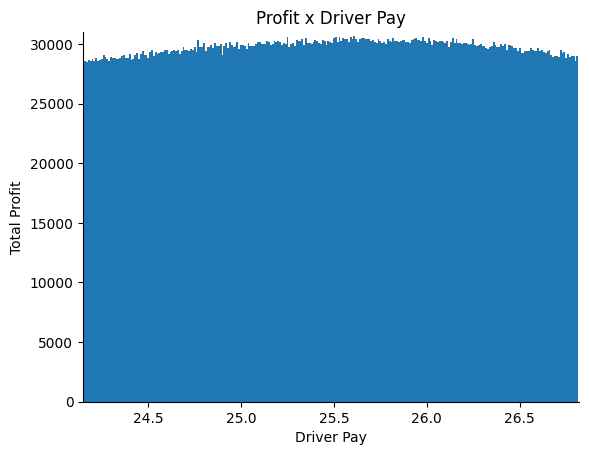

In [222]:
Profit_df = pd.DataFrame(List_Profit)
Profit_df = Profit_df.set_index([Intervals[1:3001]])
Profit_df.columns = ['Profit']

plt.bar(Total_df.index, Total_df['Profit'][0:], width=0.01)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.title('Profit x Driver Pay')
plt.xlabel('Driver Pay')
plt.ylabel('Total Profit')

plt.xlim(Min_Interval,Max_Interval)
plt.ylim(0, 31000)

In [227]:
Total_df['Profit'].mean()
print("The average maximun value for a fixed price strategy is: " + str(Total_df['Profit'].mean()))
print("Which can be achieved by charging drivers anywhere between: " + str(Min_Interval) + " and " + str(Max_Interval))

The average maximun value for a fixed price strategy is: 29758.484297003746
Which can be achieved by charging drivers anywhere between: 24.15 and 26.82


We can now check if our Ideal Range describes a normal distribution

In [225]:
from scipy.stats import shapiro 

#Shapiro-Wilk test for normality
print(shapiro(Total_df['Profit']))
print("Mean: " + str(Total_df['Profit'].mean()))
print("STD : " + str(Total_df['Profit'].std()))
# Not a normal distribution therefore we would need bootstrap methods to estimate confidence intervals

ShapiroResult(statistic=0.9433750510215759, pvalue=1.2597637599753853e-08)
Mean: 29758.484297003746
STD : 544.9538969836499


In [ ]:
#NOT-USED
Percentile_Min = np.percentile(Profit_Range, 2.5)
Percentile_Max = np.percentile(Profit_Range, 97.5)
print("When using a fixed priced strategy that pays anywhere between our established range [" + str(Min) 
      + "," + str(Max) + "] we can assert with 95% confidence that our profits will fall within the following"
      " range : [" + str(round(Percentile_Min, 2)) + "," + str(round(Percentile_Max,2)) + "] $") 

# Flexible Price Strategy

A flexible price strategy means that for each month we will vary the amount payed to our drivers. We will focus on two types of increases. A linear increase where there will be a pre established initial pay, say x, and then an increase as described by X + a fixed amount per month. Our second approach will be an exponential approach, where the increase will be determined by X to the power of a fixed amount per month. 

The main goal is to establish if it is more beneficial to incur losses early in our opperation but make up for it in the later stages due to an increased number of concurrent riders given by our preestablished distribution. 

**Linear Increase**

In [836]:
# UN-USED function which goes through every possible combination of linear increase of X defined by Y
def Linear_profit(x, y):                                                                 # x is the initial fixed amount while y is the rate of increase 

    import numpy as np
    from scipy.stats import poisson
    import itertools

    # Initial Parameters
    lamb = [1]                                                                           # Initial lambda value for our poisson distributions
    Ri_Retention = [1000]                                                                # Initial number of riders for first month
    Max_Riders = 10000                                                                   # Max. number of possible customers

    Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
    Profit = []                                                                          # Profit per itteration (month)

    # Poisson Distribution of every previous Lambda
    for month in range(0, 12):

    # Halting if Riders are exhausted
        if Max_Riders <= Exhausted_Riders:
            break

        Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
        for ele in range(0, len(lamb)):
            Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

        Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
        Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

    # Number of Riders per Number of Requests
        NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
        for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
            NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

    # We calculate the number of riders per lambda
            Lambda_Values = Unique_Values[1:]
            NRi_NRe_Values = NRi_NRe[1:] 

            Probability = []

            for i in range(0, len(NRi_NRe_Values)):
                Inner_List = []
                Exp = Lambda_Values[i]
                for e in range(1, 1+Exp):
                    Inner_List.append(NRi_NRe_Values[i]*Acceptance_Rate(x)**e)
                for u in range(0, len(Inner_List)-1):
                    Inner_List[u] = Inner_List[u] - Inner_List[u+1]
                Probability.append(Inner_List)

        Rider_Lamb = [round(sum(i),0) for i in itertools.zip_longest(*Probability, fillvalue=0)]

        Rider_Lamb = [i for i in Rider_Lamb if i != 0]
    # We calculate profits
        # Earings
        Earn = []
        for i in Rider_Lamb:
            Earn.append(i * (Rider_Lamb.index(i) + 1) * 30)
        Earn = sum(Earn)

        #Spending
        Spen = []
        for i in Rider_Lamb:
            Spen.append(i * (Rider_Lamb.index(i) + 1) * x)
        Spen = sum(Spen)

        #Profit
        Profit.append(Earn - Spen)

    # We calculate our new parametters (Rider_Retention, New Lambdas and Exhausted Riders)
        Attrition = sum(Ri_Retention) - sum(Rider_Lamb)
    
        Ri_Retention = Rider_Lamb
        if  len(Ri_Retention) == 0:
            Ri_Retention = [0] 
        Ri_Retention[0] = Ri_Retention[0] + 1000

        lamb = list(range(1, len(Rider_Lamb)+1))

        Exhausted_Riders = Exhausted_Riders + Attrition                 # New Exhausted Riders
        x = x + y
    return sum(Profit)

In order to explore the viability of a variable price strategy we should first study the progression of ride requests based on the amount payed to drivers. The basis of a variable price strategy resides in incurring losses early on in order to increase our user base to the point that those initial losses are ofset by a later increase of reveneu. The increase of our user base is determined by our inverse sigmoid function (% of driver decline basde on payment) and the additional users per month.

In [1053]:
import numpy as np
from scipy.stats import poisson
import itertools

# Initial Parameters
x = 35

lamb = [1]                                                                           # Initial lambda value for our poisson distributions
Ri_Retention = [1000]                                                                # Initial number of riders for first month
Max_Riders = 10000                                                                   # Max. number of possible customers

Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
Profit = []                                                                          # Profit per itteration (month)

Total_Rides = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Percentage_Dif = []

# Poisson Distribution of every previous Lambda
for month in range(0, 12):

# Halting if Riders are exhausted
    if Max_Riders <= Exhausted_Riders:
        break

    Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
    for ele in range(0, len(lamb)):
        Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

    Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
    Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

# Number of Riders per Number of Requests
    NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
    for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
        NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

# We calculate the number of riders per lambda
        Lambda_Values = Unique_Values[1:]
        NRi_NRe_Values = NRi_NRe[1:] 

        Probability = []

        for i in range(0, len(NRi_NRe_Values)):
            Inner_List = []
            Exp = Lambda_Values[i]
            for e in range(1, 1+Exp):
                Inner_List.append(NRi_NRe_Values[i]*Acceptance_Rate(x)**e)
            for u in range(0, len(Inner_List)-1):
                Inner_List[u] = Inner_List[u] - Inner_List[u+1]
            Probability.append(Inner_List)

    Rider_Lamb = [round(sum(i),0) for i in itertools.zip_longest(*Probability, fillvalue=0)]

    Rider_Lamb = [i for i in Rider_Lamb if i != 0]

# We calculate our new parametters (Rider_Retention, New Lambdas and Exhausted Riders)
    Attrition = sum(Ri_Retention) - sum(Rider_Lamb)
    
    Ri_Retention = Rider_Lamb
    if  len(Ri_Retention) == 0:
        Ri_Retention = [0] 
    
    lamb = list(range(1, len(Rider_Lamb)+1))  

# Difference of number of rides accepted based on previous loop.
    Retention_Array = np.array(Ri_Retention)
    Lamb_Array = np.array(lamb)
    Total_Rides[month] = sum(Retention_Array*Lamb_Array)

    if month > 0:
        Percentage_Dif.append(round((Total_Rides[month]*100/Total_Rides[month-1])-100, 2))
    else:
        Percentage_Dif.append(0)

    Ri_Retention[0] = Ri_Retention[0] + 1000
    



    Exhausted_Riders = Exhausted_Riders + Attrition                 # New Exhausted Riders


print(Total_Rides)

[903.0, 1598.0, 2236.0, 2798.0, 3265.0, 3608.0, 4017.0, 4310.0, 4462.0, 4540.0, 4534.0, 4624.0]


In [340]:
# Modification of our previously used function which outputs our variables of interest
def Rider_Progression(x):
    import numpy as np
    from scipy.stats import poisson
    import itertools

    # Initial Parameters
    lamb = [1]                                                                           # Initial lambda value for our poisson distributions
    Ri_Retention = [1000]                                                                # Initial number of riders for first month
    Max_Riders = 10000                                                                   # Max. number of possible customers

    Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
    Profit = []                                                                          # Profit per itteration (month)

    Total_Rides = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    Percentage_Dif = []

    # Poisson Distribution of every previous Lambda
    for month in range(0, 12):

    # Halting if Riders are exhausted
        if Max_Riders <= Exhausted_Riders:
            break

        Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
        for ele in range(0, len(lamb)):
            Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

        Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
        Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

    # Number of Riders per Number of Requests
        NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
        for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
            NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

    # We calculate the number of riders per lambda
            Lambda_Values = Unique_Values[1:]
            NRi_NRe_Values = NRi_NRe[1:] 

            Probability = []

            for i in range(0, len(NRi_NRe_Values)):
                Inner_List = []
                Exp = Lambda_Values[i]
                for e in range(1, 1+Exp):
                    Inner_List.append(NRi_NRe_Values[i]*Acceptance_Rate(x)**e)
                for u in range(0, len(Inner_List)-1):
                    Inner_List[u] = Inner_List[u] - Inner_List[u+1]
                Probability.append(Inner_List)

        Rider_Lamb = [round(sum(i),0) for i in itertools.zip_longest(*Probability, fillvalue=0)]

        Rider_Lamb = [i for i in Rider_Lamb if i != 0]

    # We calculate our new parametters (Rider_Retention, New Lambdas and Exhausted Riders)
        Attrition = sum(Ri_Retention) - sum(Rider_Lamb)
    
        Ri_Retention = Rider_Lamb
        if  len(Ri_Retention) == 0:
            Ri_Retention = [0] 
    
        lamb = list(range(1, len(Rider_Lamb)+1))  

    # Difference of number of rides accepted based on previous loop.
        Retention_Array = np.array(Ri_Retention)
        Lamb_Array = np.array(lamb)
        Total_Rides[month] = sum(Retention_Array*Lamb_Array)

        if month > 0:
            Percentage_Dif.append(round((Total_Rides[month]*100/Total_Rides[month-1])-100, 2))
        else:
            Percentage_Dif.append(0)

    # We calculate profits
        # Earings
        Earn = []
        for i in Rider_Lamb:
            Earn.append(i * (Rider_Lamb.index(i) + 1) * 30)
        Earn = sum(Earn)

        #Spending
        Spen = []
        for i in Rider_Lamb:
            Spen.append(i * (Rider_Lamb.index(i) + 1) * x)
        Spen = sum(Spen)

        #Profit
        Profit.append(Earn - Spen)


        Ri_Retention[0] = Ri_Retention[0] + 1000


        Exhausted_Riders = Exhausted_Riders + Attrition                 # New Exhausted Riders

    return(Percentage_Dif, Total_Rides, Profit)

In [341]:
# Selecting only the values [25.00, 30.00, 35.00, 40.00] and itterating 100 times
from tqdm import tqdm
# Itterating our function over every price interval
T_R_Interval = []

for u in tqdm(range(0, 100)):
    List_Rider_Interval = []
    for i in [25, 30, 35, 40]:
        List_Rider_Interval.append(Rider_Progression(i))
    T_R_Interval.append(List_Rider_Interval)



100%|██████████| 100/100 [07:15<00:00,  4.36s/it]


In [342]:
# Separating and averaging the values of our variables per month
Total_Percent_DIF = []

for i in range(0, len(T_R_Interval[0])):
    Avg_T_R = []
    for u in range(0, len(T_R_Interval)):
        Avg_T_R.append(np.array(T_R_Interval[u][i][0]))
    Total_Percent_DIF.append(list(np.mean(Avg_T_R, axis=0)))

Total_DIF = []
for i in range(0, len(T_R_Interval[0])):
    Avg_T_R = []
    for u in range(0, len(T_R_Interval)):
        Avg_T_R.append(np.array(T_R_Interval[u][i][1]))
    Total_DIF.append(list(np.mean(Avg_T_R, axis=0)))

Total_Profit = []
for i in range(0, len(T_R_Interval[0])):
    Avg_T_R = []
    for u in range(0, len(T_R_Interval)):
        Avg_T_R.append(np.array(T_R_Interval[u][i][2]))
    Total_Profit.append(list(np.mean(Avg_T_R, axis=0)))

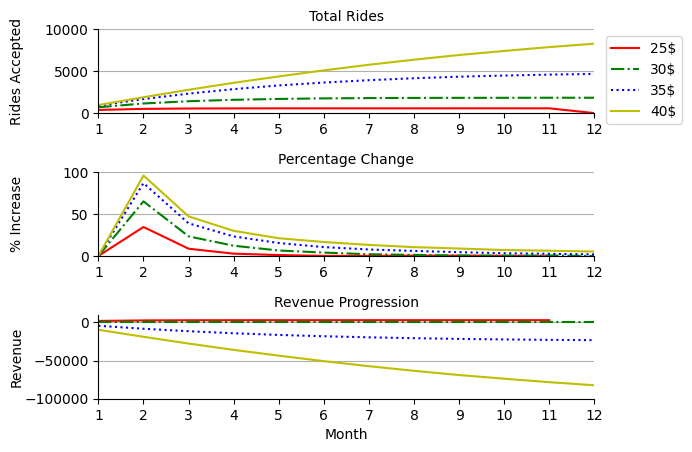

In [343]:
# Plotting our variables in a single figure
import matplotlib.pyplot as plt
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
fig = plt.figure()
ax = fig.add_subplot(111)   
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Total Rider Progression
ax1.plot(Total_DIF[0], '-r', label='25$')
ax1.plot(Total_DIF[1], '-.g', label='30$')
ax1.plot(Total_DIF[2],':b', label='35$')
ax1.plot(Total_DIF[3],'-y', label='40$')
ax1.set_xlim(0,11)
ax1.set_ylim(0,10000)
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.grid(axis='y')
ax1.set_xticks(a, a+1)

# Percentage of Rides Change
ax2.plot(Total_Percent_DIF[0], '-r')
ax2.plot(Total_Percent_DIF[1], '-.g')
ax2.plot(Total_Percent_DIF[2],':b')
ax2.plot(Total_Percent_DIF[3],'-y')
ax2.set_xlim(0,11)
ax2.set_ylim(0,100)
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.grid(axis='y')
ax2.set_xticks(a, a+1)

# Profit
ax3.plot(Total_Profit[0], '-r')
ax3.plot(Total_Profit[1], '-.g')
ax3.plot(Total_Profit[2],':b')
ax3.plot(Total_Profit[3],'-y')
ax3.set_xlim(0,11)
ax3.set_ylim(-100000,10000)
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.grid(axis='y')
ax3.set_xticks(a, a+1)

plt.subplots_adjust(hspace=0.7)

# Common Title
ax.set_xlabel('Month')

# Subplot Titles
ax1.set_title('Total Rides', fontsize=10)
ax1.set_ylabel('Rides Accepted')
ax1.yaxis.set_label_coords(-0.15,0.5)

ax2.set_title('Percentage Change', fontsize=10)
ax2.set_ylabel('% Increase')
ax2.yaxis.set_label_coords(-0.15,0.5)

ax3.set_title('Revenue Progression', fontsize=10)
ax3.set_ylabel('Revenue')
ax3.yaxis.set_label_coords(-0.15,0.5)

lgd = ax1.legend(loc=9, bbox_to_anchor=(1.1,1))
plt.show()

In [328]:
def Rider_Progression_HalfPoint(x):
    import numpy as np
    from scipy.stats import poisson
    import itertools

    # Initial Parameters
    lamb = [1]                                                                           # Initial lambda value for our poisson distributions
    Ri_Retention = [1000]                                                                # Initial number of riders for first month
    Max_Riders = 10000                                                                   # Max. number of possible customers

    Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
    Profit = []                                                                          # Profit per itteration (month)

    Total_Rides = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    Percentage_Dif = []

    # Poisson Distribution of every previous Lambda
    for month in range(0, 12):
        if month >= 3:
            x = 25

    # Halting if Riders are exhausted
        if Max_Riders <= Exhausted_Riders:
            break

        Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
        for ele in range(0, len(lamb)):
            Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

        Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
        Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

    # Number of Riders per Number of Requests
        NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
        for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
            NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

    # We calculate the number of riders per lambda
            Lambda_Values = Unique_Values[1:]
            NRi_NRe_Values = NRi_NRe[1:] 

            Probability = []

            for i in range(0, len(NRi_NRe_Values)):
                Inner_List = []
                Exp = Lambda_Values[i]
                for e in range(1, 1+Exp):
                    Inner_List.append(NRi_NRe_Values[i]*Acceptance_Rate(x)**e)
                for u in range(0, len(Inner_List)-1):
                    Inner_List[u] = Inner_List[u] - Inner_List[u+1]
                Probability.append(Inner_List)

        Rider_Lamb = [round(sum(i),0) for i in itertools.zip_longest(*Probability, fillvalue=0)]

        Rider_Lamb = [i for i in Rider_Lamb if i != 0]

    # We calculate our new parametters (Rider_Retention, New Lambdas and Exhausted Riders)
        Attrition = sum(Ri_Retention) - sum(Rider_Lamb)
    
        Ri_Retention = Rider_Lamb
        if  len(Ri_Retention) == 0:
            Ri_Retention = [0] 
    
        lamb = list(range(1, len(Rider_Lamb)+1))  

    # Difference of number of rides accepted based on previous loop.
        Retention_Array = np.array(Ri_Retention)
        Lamb_Array = np.array(lamb)
        Total_Rides[month] = sum(Retention_Array*Lamb_Array)

        if month > 0:
            Percentage_Dif.append(round((Total_Rides[month]*100/Total_Rides[month-1])-100, 2))
        else:
            Percentage_Dif.append(0)

    # We calculate profits
        # Earings
        Earn = []
        for i in Rider_Lamb:
            Earn.append(i * (Rider_Lamb.index(i) + 1) * 30)
        Earn = sum(Earn)

        #Spending
        Spen = []
        for i in Rider_Lamb:
            Spen.append(i * (Rider_Lamb.index(i) + 1) * x)
        Spen = sum(Spen)

        #Profit
        Profit.append(Earn - Spen)


        Ri_Retention[0] = Ri_Retention[0] + 1000


        Exhausted_Riders = Exhausted_Riders + Attrition                 # New Exhausted Riders

    return(Percentage_Dif, Total_Rides, Profit)

In [332]:
# Selecting only the interval [25.00, 30.00, 35.00, 40.00] and itterating 100 times
from tqdm import tqdm
# Itterating our function over every price interval
T_R_Interval_HP = []

for u in tqdm(range(0, 100)):
    List_Rider_Interval_HP = []
    for i in [25, 30, 35, 40]:
        List_Rider_Interval_HP.append(Rider_Progression_HalfPoint(i))
    T_R_Interval_HP.append(List_Rider_Interval_HP)

100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


In [333]:
# Separating and averaging the values of our variables per month
Total_Percent_DIF = []

for i in range(0, len(T_R_Interval_HP[0])):
    Avg_T_R = []
    for u in range(0, len(T_R_Interval_HP)):
        Avg_T_R.append(np.array(T_R_Interval_HP[u][i][0]))
    Total_Percent_DIF.append(list(np.mean(Avg_T_R, axis=0)))

Total_DIF = []
for i in range(0, len(T_R_Interval_HP[0])):
    Avg_T_R = []
    for u in range(0, len(T_R_Interval_HP)):
        Avg_T_R.append(np.array(T_R_Interval_HP[u][i][1]))
    Total_DIF.append(list(np.mean(Avg_T_R, axis=0)))

Total_Profit = []
for i in range(0, len(T_R_Interval_HP[0])):
    Avg_T_R = []
    for u in range(0, len(T_R_Interval_HP)):
        Avg_T_R.append(np.array(T_R_Interval_HP[u][i][2]))
    Total_Profit.append(list(np.mean(Avg_T_R, axis=0)))

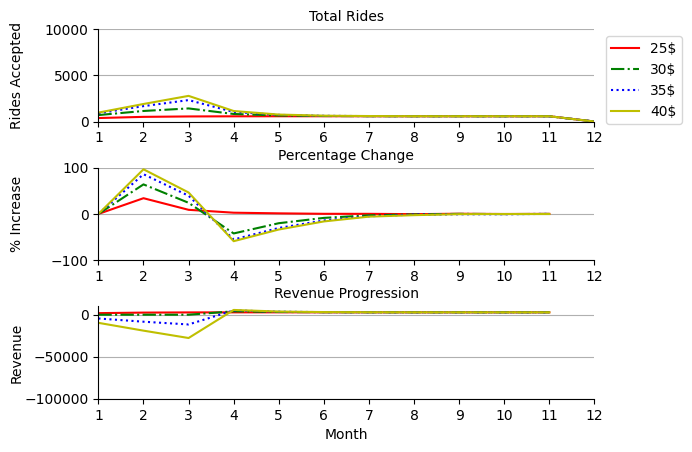

In [338]:
import matplotlib.pyplot as plt

a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

fig = plt.figure()
ax = fig.add_subplot(111)   
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Total Rider Progression
ax1.plot(Total_DIF[0], '-r', label='25$')
ax1.plot(Total_DIF[1], '-.g', label='30$')
ax1.plot(Total_DIF[2],':b', label='35$')
ax1.plot(Total_DIF[3],'-y', label='40$')
ax1.set_xlim(0,11)
ax1.set_ylim(0,10000)
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.grid(axis='y')

# Percentage of Rides Change
ax2.plot(Total_Percent_DIF[0], '-r', label='25$')
ax2.plot(Total_Percent_DIF[1], '-.g', label='30$')
ax2.plot(Total_Percent_DIF[2],':b', label='35$')
ax2.plot(Total_Percent_DIF[3],'-y', label='40$')
ax2.set_xlim(0,11)
ax2.set_ylim(-100,100)
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.grid(axis='y')

# Profit
ax3.plot(Total_Profit[0], '-r', label='25$')
ax3.plot(Total_Profit[1], '-.g', label='30$')
ax3.plot(Total_Profit[2],':b', label='35$')
ax3.plot(Total_Profit[3],'-y', label='40$')
ax3.set_xlim(0,11)
ax3.set_ylim(-100000,10000)
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.grid(axis='y')

plt.subplots_adjust(hspace=0.5)
# Common Title
ax.set_xlabel('Month')

# Subplot Titles
ax1.set_title('Total Rides', fontsize=10)
ax1.set_ylabel('Rides Accepted')
ax1.yaxis.set_label_coords(-0.15,0.5)
ax1.set_xticks(a, a+1)

ax2.set_title('Percentage Change', fontsize=10)
ax2.set_ylabel('% Increase')
ax2.yaxis.set_label_coords(-0.15,0.5)
ax2.set_xticks(a, a+1)

ax3.set_title('Revenue Progression', fontsize=10)
ax3.set_ylabel('Revenue')
ax3.yaxis.set_label_coords(-0.15,0.5)
ax3.set_xticks(a, a+1)

lgd = ax1.legend(loc=9, bbox_to_anchor=(1.1,1))
plt.show()